In [1]:
import matplotlib.pylab as plt
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms

torch.manual_seed(2)

In [10]:
IMG = '../../../img'

In [2]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        '''Args:
        - D_in is the input size of the first layer (size of input 
          layer)
        - H1 is the output size of the first layer and input size of
          the second layer (size of first hidden layer)
        - H2 is the outpout size of the second layer and the input size
          of the third layer (size of second hidden layer)
        - D_out is the output size of the third layer (size of output
          layer)
        '''
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self,x):
        x = torch.sigmoid(self.linear1(x)) 
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

In [3]:
class NetRelu(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        '''Args:
        - D_in is the input size of the first layer (size of input
          layer)
        - H1 is the output size of the first layer and input size of
          the second layer (size of first hidden layer)
        - H2 is the outpout size of the second layer and the input size
          of the third layer (size of second hidden layer)
        - D_out is the output size of the third layer (size of output
          layer)
        '''
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [4]:
def train(
        model, criterion, train_loader, validation_loader, optimizer, 
        epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)    
    return useful_stuff

In [11]:
!ls ../../..

README.md         img               oneoffs
coursera          mastering_with_tf


In [12]:
train_dataset = dsets.MNIST(
    root=IMG,
    train=True,
    download=True,
    transform=transforms.ToTensor())

In [13]:
validation_dataset = dsets.MNIST(
    root=IMG,
    train=False,
    download=True,
    transform=transforms.ToTensor())

In [14]:
criterion = nn.CrossEntropyLoss()

In [15]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(
    dataset=validation_dataset, batch_size=5000, shuffle=False)

In [16]:
input_dim = 28 * 28 # Diemension of an image
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10 # Number of classes

In [17]:
cust_epochs = 10  # small here for speed, but more is better

In [19]:
learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(
    model,
    criterion,
    train_loader,
    validation_loader,
    optimizer,
    epochs=cust_epochs)

In [20]:
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(
    modelRelu, 
    criterion,
    train_loader,
    validation_loader,
    optimizer,
    epochs=cust_epochs)

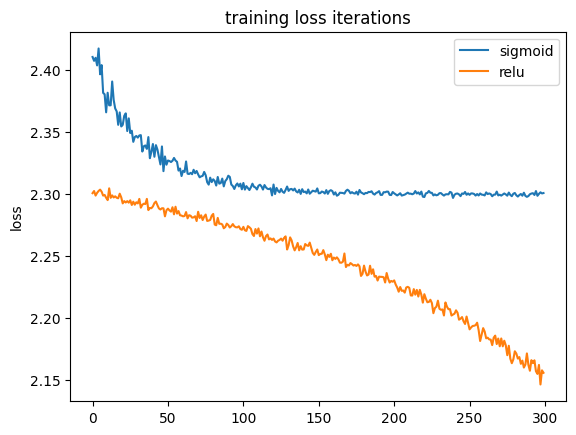

In [22]:
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend();

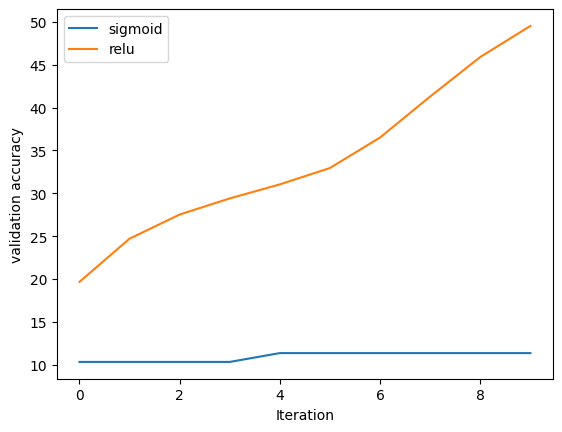

In [23]:
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend();